# Problem Statement

### Current Situation:
    A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. Currently to find house price , an concern person has to manually try to find similar properties in the neighbourhood , and according to that estimate an house price which requires a lot of time. And again in the same neighnourhood some other person has to sell or buy a house , again he has to manually do the whole steps.  
    
    
### Project Aim:
    We can create a prediction model, which will consider the house's age, number of bathrooms , bedrooms , square fts etc and for a new set of input it will predict the house price. It will save a lot of time.
    Find relationship between features so identify what influences which parametes 
    
### Data Requirement: 
    We will need survey data , which will consists of house details and house prices. House details can be sqaure fts, number of bedrooms, bathrooms, ceils , furnished or not furnished, sight , location etc. 

### Source of data :
    As part of capstone project, we were given a dataset which consists of around 21000 data points. We will use this data set to create a model for house price prediction.
    This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

    
    

### Data Set Details:
    Following are set of columns that are present in the dataset
    1. cid: a notation for a house 
    2. dayhours: Date house was sold
    3. price: Price is prediction target 
    4. room_bed: Number of Bedrooms/House 
    5. room_bath: Number of bathrooms/bedrooms 
    6. living_measure: square footage of the home
    7. lot_measure: quare footage of the lot
    8. ceil: Total floors (levels) in house 
    9. coast: House which has a view to a waterfront 
    10. sight: Has been viewed 
    11. condition: How good the condition is (Overall) 
    12. quality: grade given to the housing unit, based on grading system
    13. ceil_measure: square footage of house apart from basement 
    14. basement_measure: square footage of the basement 
    15. yr_built: Built Year
    16. yr_renovated: Year when house was renovated 
    17. zipcode: zip 
    18. lat: Latitude coordinate 
    19. long: Longitude coordinate
    20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
    21. lot_measure15: lotSize area in 2015(implies-- some renovations) 
    22. furnished: Based on the quality of room 
    23: total_area: Measure of both living and lot

In [1]:
### Importing necessary modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_style("whitegrid")
%matplotlib inline
import itertools 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.decomposition import PCA
from matplotlib import style
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
## importing data set
innercity_df = pd.read_csv('innercity.csv')

### Begins : Exploratory Data Analysis

In [4]:
innercity_df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [5]:
innercity_df.shape

(21613, 23)

In [6]:
innercity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

##### Initial Analysis:
    After checking the data set in exel , we found that the dayhours columns is span for only 1 year. 
    The data type of dayhours in Object. We might have to change that , or we might have to remove this column as time frame is only 1 year.

In [7]:
## Checking for null data
print(innercity_df.isnull().any())
def missing_val(df):
# here is a function to check for the missing values:
    missing=innercity_df.isnull().sum()/len(df)*100
    return missing[missing>0]

print(missing_val(innercity_df))

cid                 False
dayhours            False
price               False
room_bed            False
room_bath           False
living_measure      False
lot_measure         False
ceil                False
coast               False
sight               False
condition           False
quality             False
ceil_measure        False
basement            False
yr_built            False
yr_renovated        False
zipcode             False
lat                 False
long                False
living_measure15    False
lot_measure15       False
furnished           False
total_area          False
dtype: bool
Series([], dtype: float64)


##### There is no null data, means all rows and columns are filled.

### EDA : 

In [8]:
# The Dayhours column gives the time of selling the house. As the value of this columns is span on 1 year only, 
# we will take the year only 
# just the year is sufficient since there is not a lot of impact of months.
# Extracting the values of year from dayhours column:

innercity_df['dayhours']= pd.to_datetime(innercity_df['dayhours']) 
print(innercity_df.info())
## taking only year part
innercity_df['dayhours'] = pd.DatetimeIndex(innercity_df['dayhours']).year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null datetime64[ns]
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished    

In [9]:
innercity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null int64
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           21

In [10]:
print(innercity_df['dayhours'].unique())
innercity_df.head()

[2014 2015]


cid  dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666      2014  808100         4       3.25            3020   
1  8731981640      2014  277500         4       2.50            2550   
2  5104530220      2015  404000         3       2.50            2370   
3  6145600285      2014  300000         2       1.00             820   
4  8924100111      2015  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

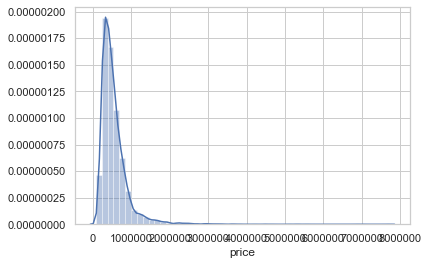

In [11]:
sns.distplot(innercity_df['price'],kde=True);


##### Analysis: 
    The target variables has some positive skewness, deviates from
    normal distribution. Let's take a look at the skewness and kurtosis in numbers:

In [12]:
print("Skewness: %f" % innercity_df['price'].skew())
print("Kurtosis: %f" % innercity_df['price'].kurt())

Skewness: 4.021716
Kurtosis: 34.522444


In the data standardisation section, we will fix this.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9DD57CA58>,
      dtype=object)

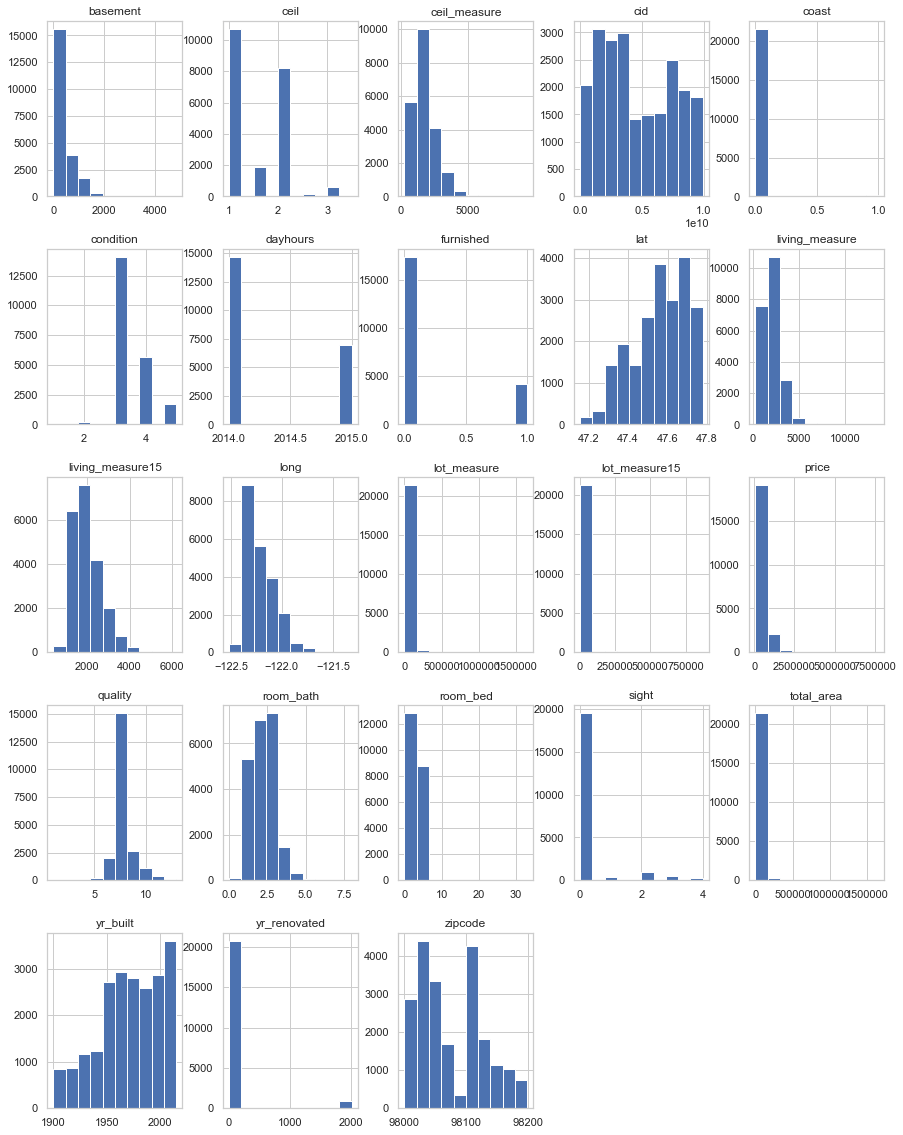

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
innercity_df.hist(ax = ax)

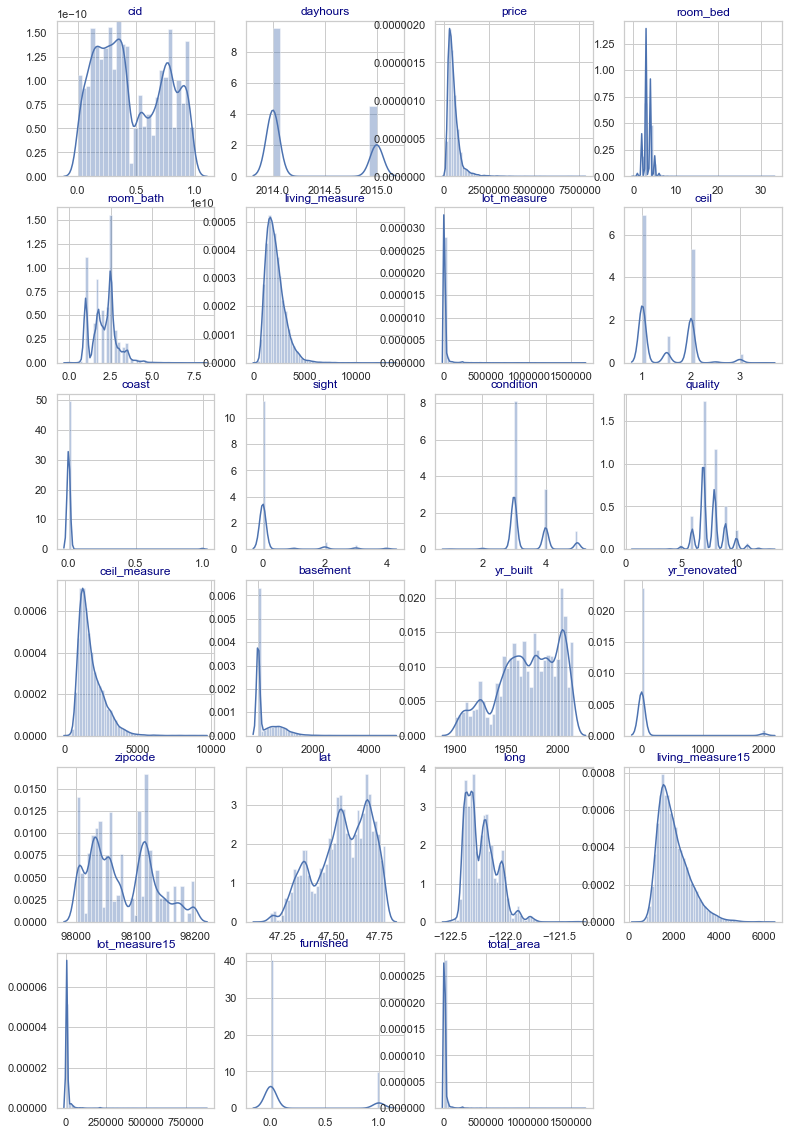

In [14]:
cols = innercity_df.columns
length = len(cols)
fig = plt.figure(figsize=(13,20))

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(6,4,j+1)
    ax = sns.distplot(innercity_df[i],kde=True,hist_kws={"linewidth": 1})
    ax.set_facecolor("w")
#     plt.axvline(innercity_df[i].mean(),linestyle="dashed",label="mean",color="k" )
#     plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

#### Analysis :
    From KDE we can see for some univariate distribution there are multiple picks. which could indicate some clusters.
    living measure,ceil_measure,living_meassure15 has somewhat skewed distributions 

Text(0.5, 1.0, 'Zipcode Vs Price')

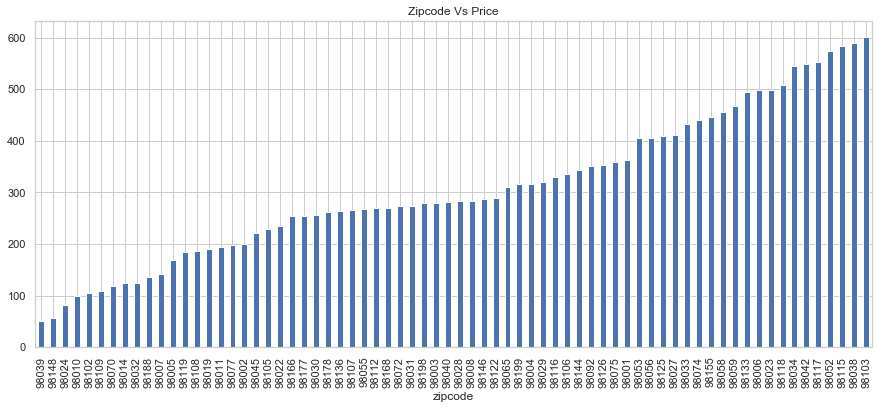

In [15]:
innercity_df.groupby(['zipcode']).price.count().sort_values().plot(kind='bar',figsize=(15,6))
plt.title("Zipcode Vs Price")

Text(0.5, 1.0, ' No. of Bedrooms Vs Price')

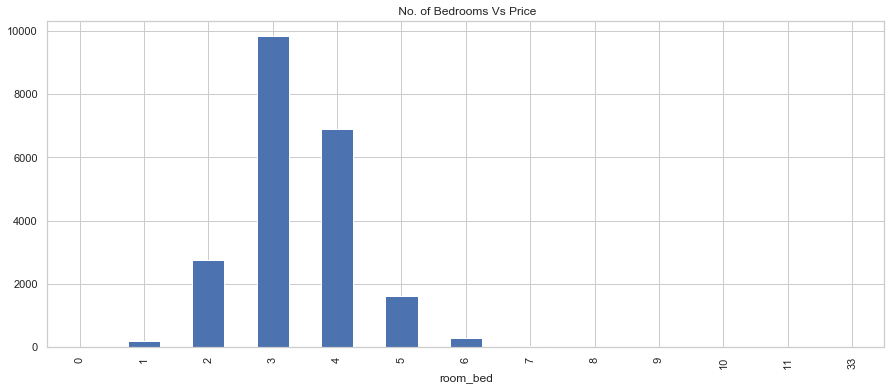

In [16]:
innercity_df.groupby(['room_bed']).price.count().plot(kind='bar',figsize=(15,6))
plt.title(" No. of Bedrooms Vs Price")

Text(0.5, 1.0, ' Quality Vs Price')

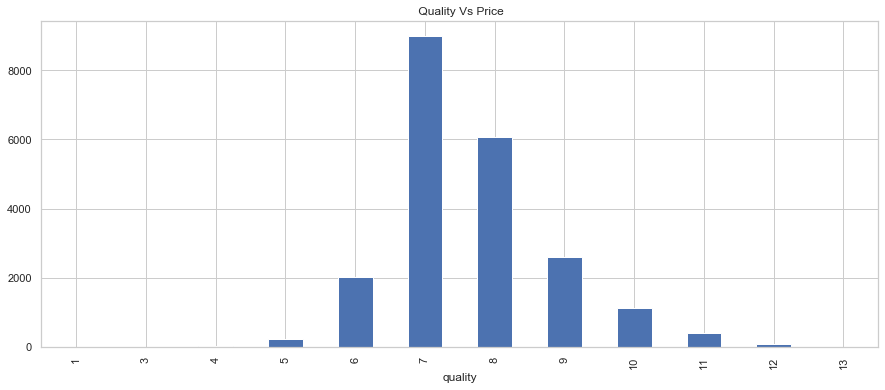

In [17]:
innercity_df.groupby(['quality']).price.count().plot(kind='bar',figsize=(15,6))
plt.title(" Quality Vs Price")

Text(0.5, 1.0, ' Condition Vs Price')

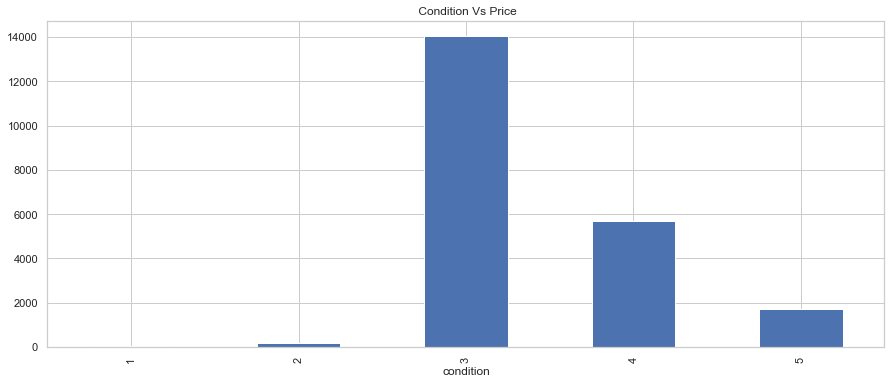

In [18]:
innercity_df.groupby(['condition']).price.count().plot(kind='bar',figsize=(15,6))
plt.title(" Condition Vs Price")

In [19]:
## different features by plotting them to determine the relationship to SalePrice

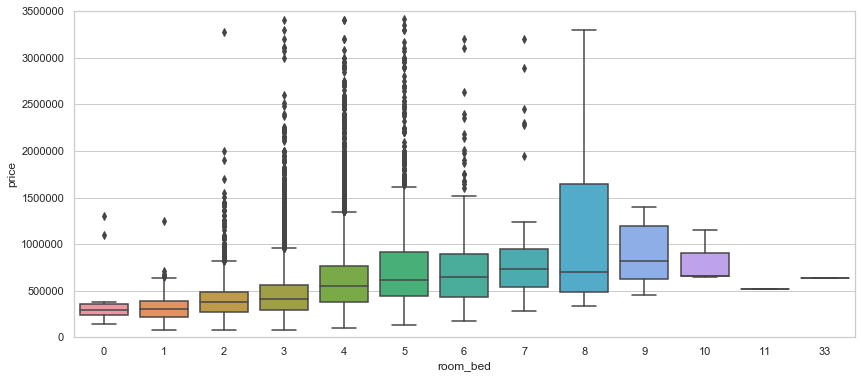

In [20]:
var = 'room_bed'
data = pd.concat([innercity_df['price'], innercity_df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

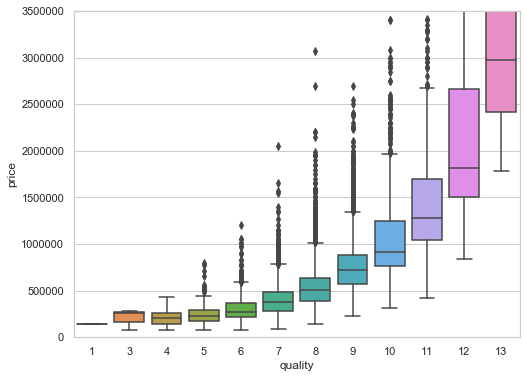

In [21]:
var = 'quality'
data = pd.concat([innercity_df['price'], innercity_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

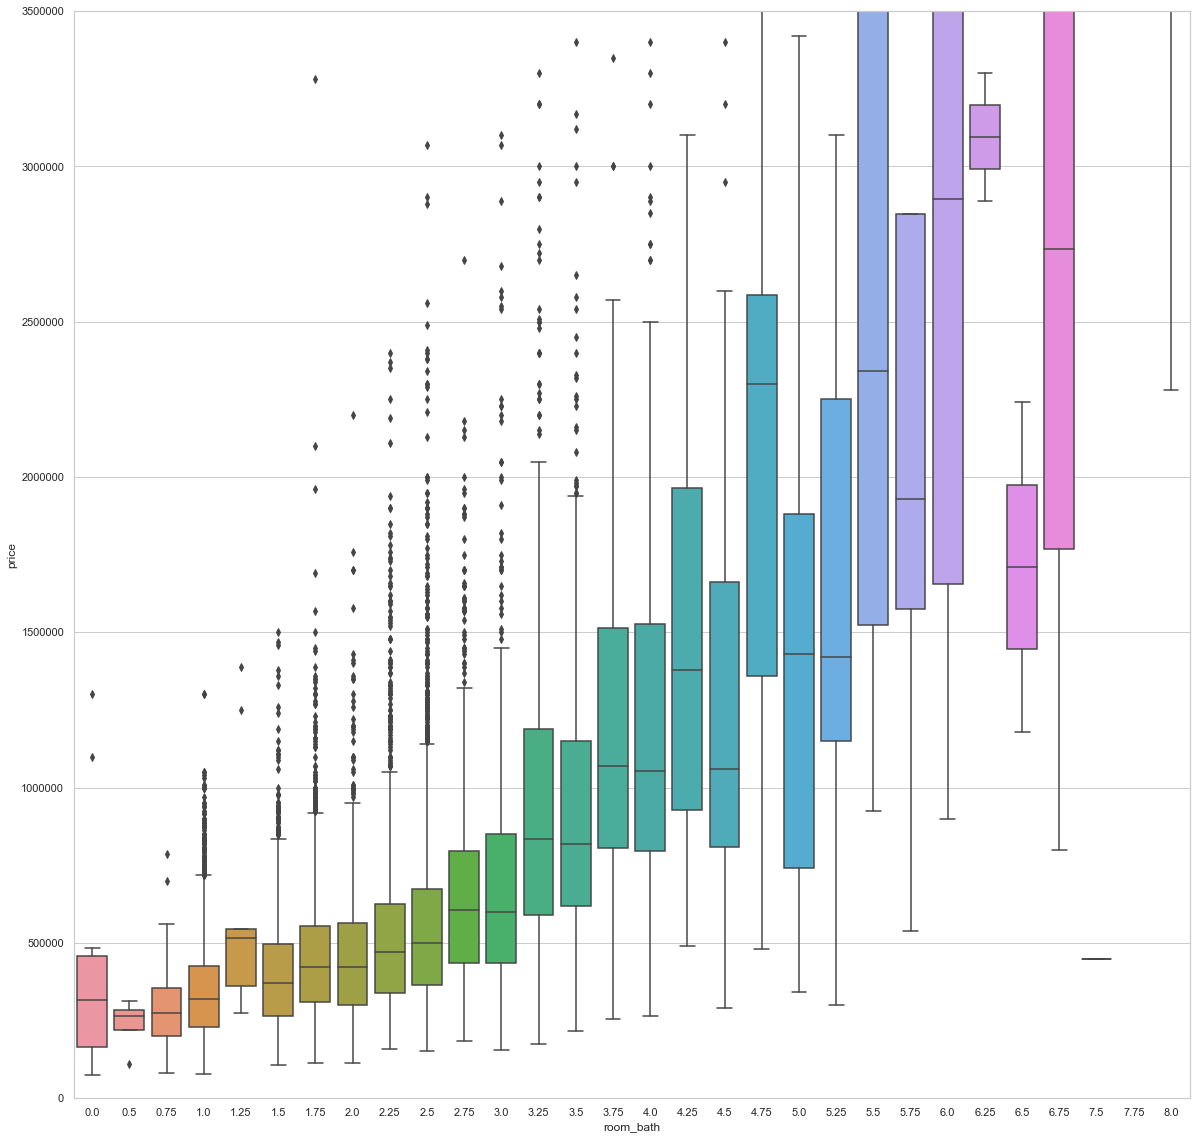

In [22]:
var = 'room_bath'
data = pd.concat([innercity_df['price'], innercity_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

In [23]:
innercity_df['room_bath'].unique()

array([3.25, 2.5 , 1.  , 1.5 , 1.75, 2.  , 2.75, 2.25, 3.  , 4.  , 4.5 ,
       3.5 , 5.25, 4.75, 4.25, 5.  , 7.75, 3.75, 0.75, 5.5 , 6.75, 1.25,
       6.25, 0.  , 5.75, 6.  , 0.5 , 6.5 , 7.5 , 8.  ])

#### Analysis :
    features "room_bed", "quality", "room_bath" increase, so does the price. 
    There are outliers for each of these features
   

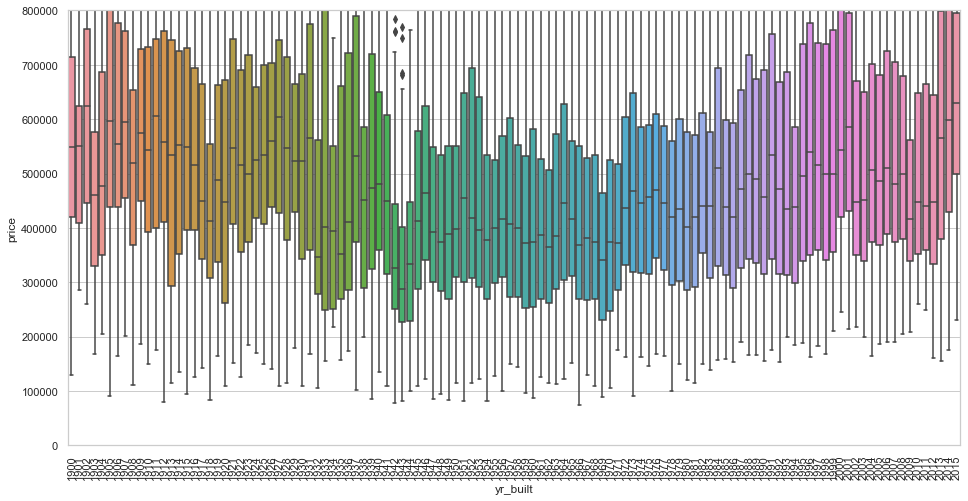

In [24]:
var = 'yr_built'
data = pd.concat([innercity_df['price'], innercity_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### Aalysis:
    Generally with year of build of houses should have a linear relationship house price. 
    But data is not showing that

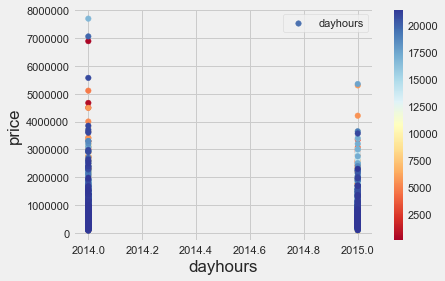

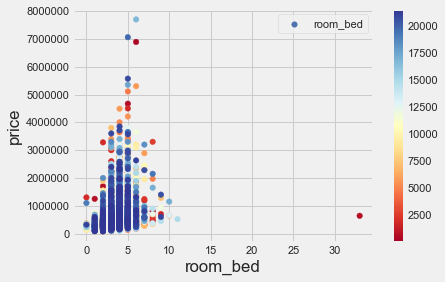

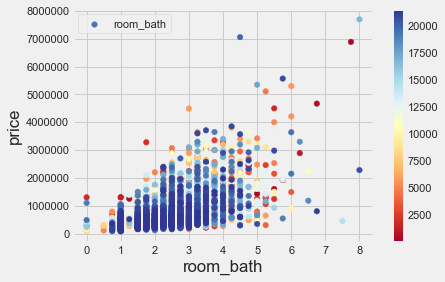

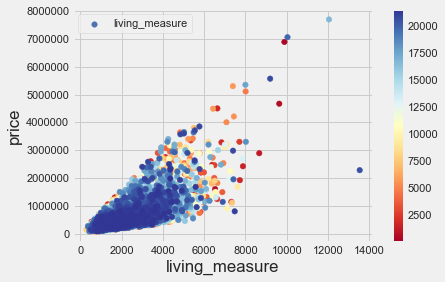

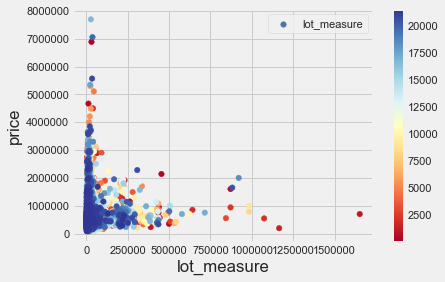

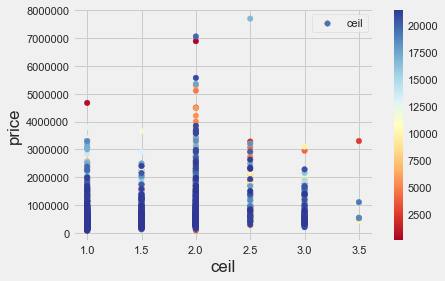

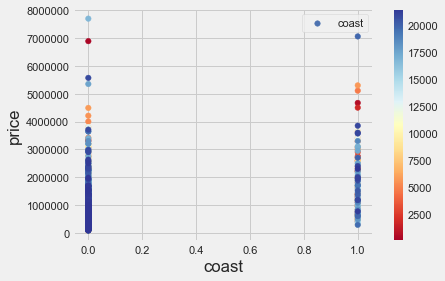

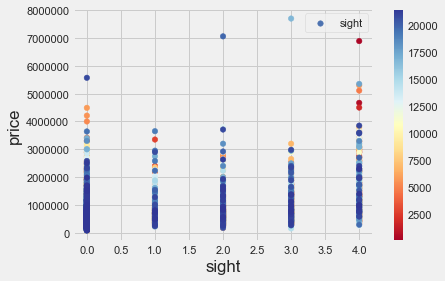

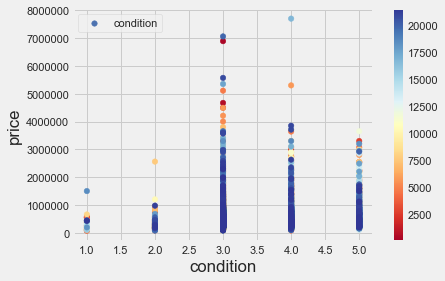

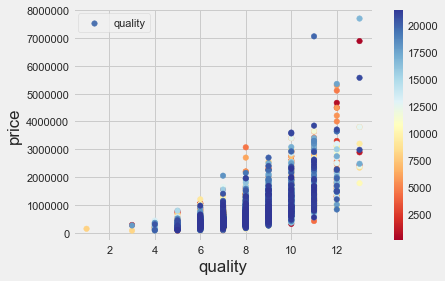

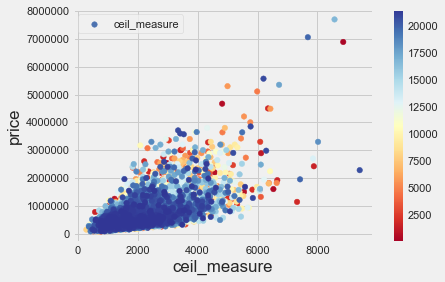

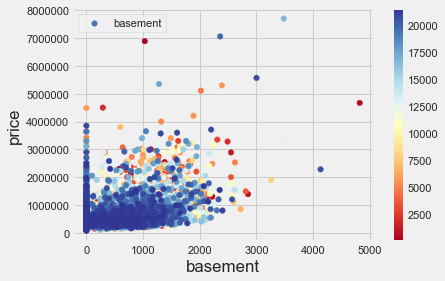

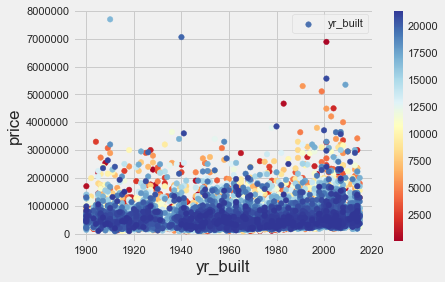

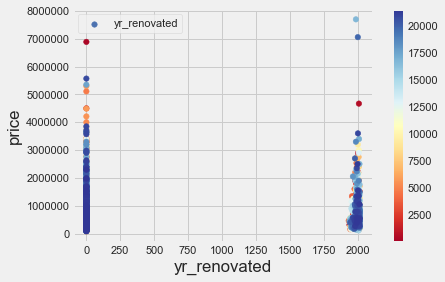

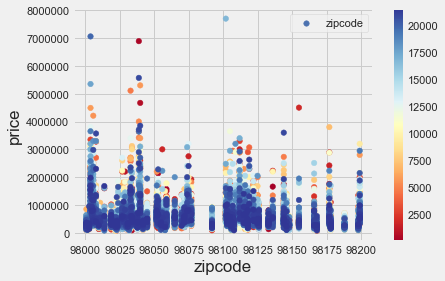

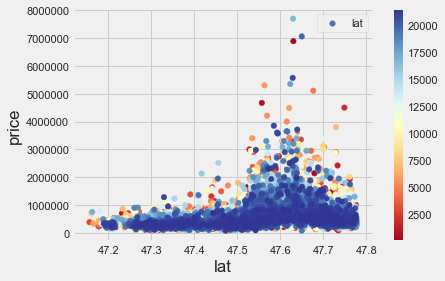

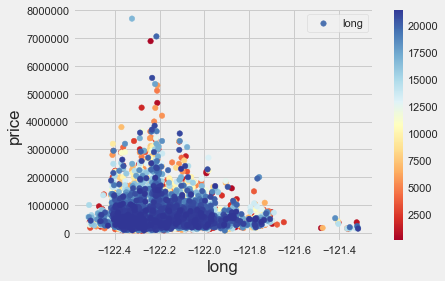

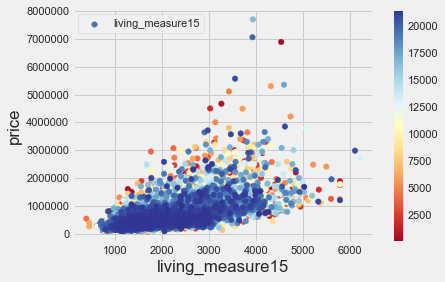

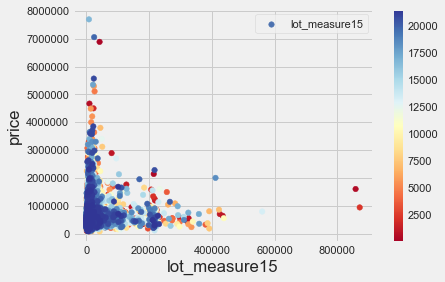

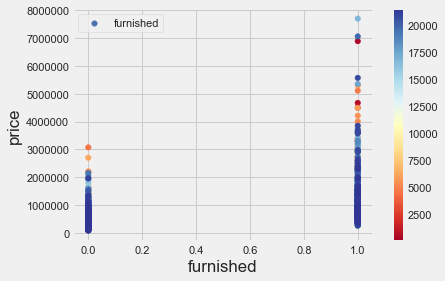

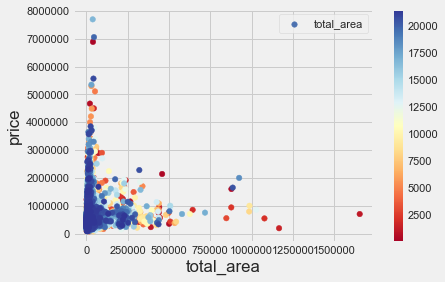

In [25]:

features = innercity_df.columns.tolist()
features.remove('cid')
features.remove('price')
style.use('fivethirtyeight')
cm = plt.cm.get_cmap('RdYlBu')
xy = range(1,21614)
z = xy
for feature in features:
    sc = plt.scatter(innercity_df[feature], innercity_df['price'], label = feature, c = z, marker = 'o', s = 30, cmap = cm)
    plt.colorbar(sc)
    plt.xlabel(''+feature)
    plt.ylabel('price')
#     plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
#             ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M',])
    plt.legend()
    plt.show()

#### Analysis:
    - There is a linear relationship of price with ceil_measure,living_measure15,Living measure
    - Price of furnished houses are higher than unfurnished houses as expected
    - With quality increases the price of the house also increases
    - As this data is collected from a particular area, so long and lat are concentrated on in one particular range
    - Clearly with number of bathroom increases, price also increase
    - There is one particluar data with 33 bed rooms, which very unlikely. we may want to drop this particular outlier. because it will have an impact while creating model.
    - We will verify the above with heatmap
    

In [26]:
## Relation ship between different independent variables

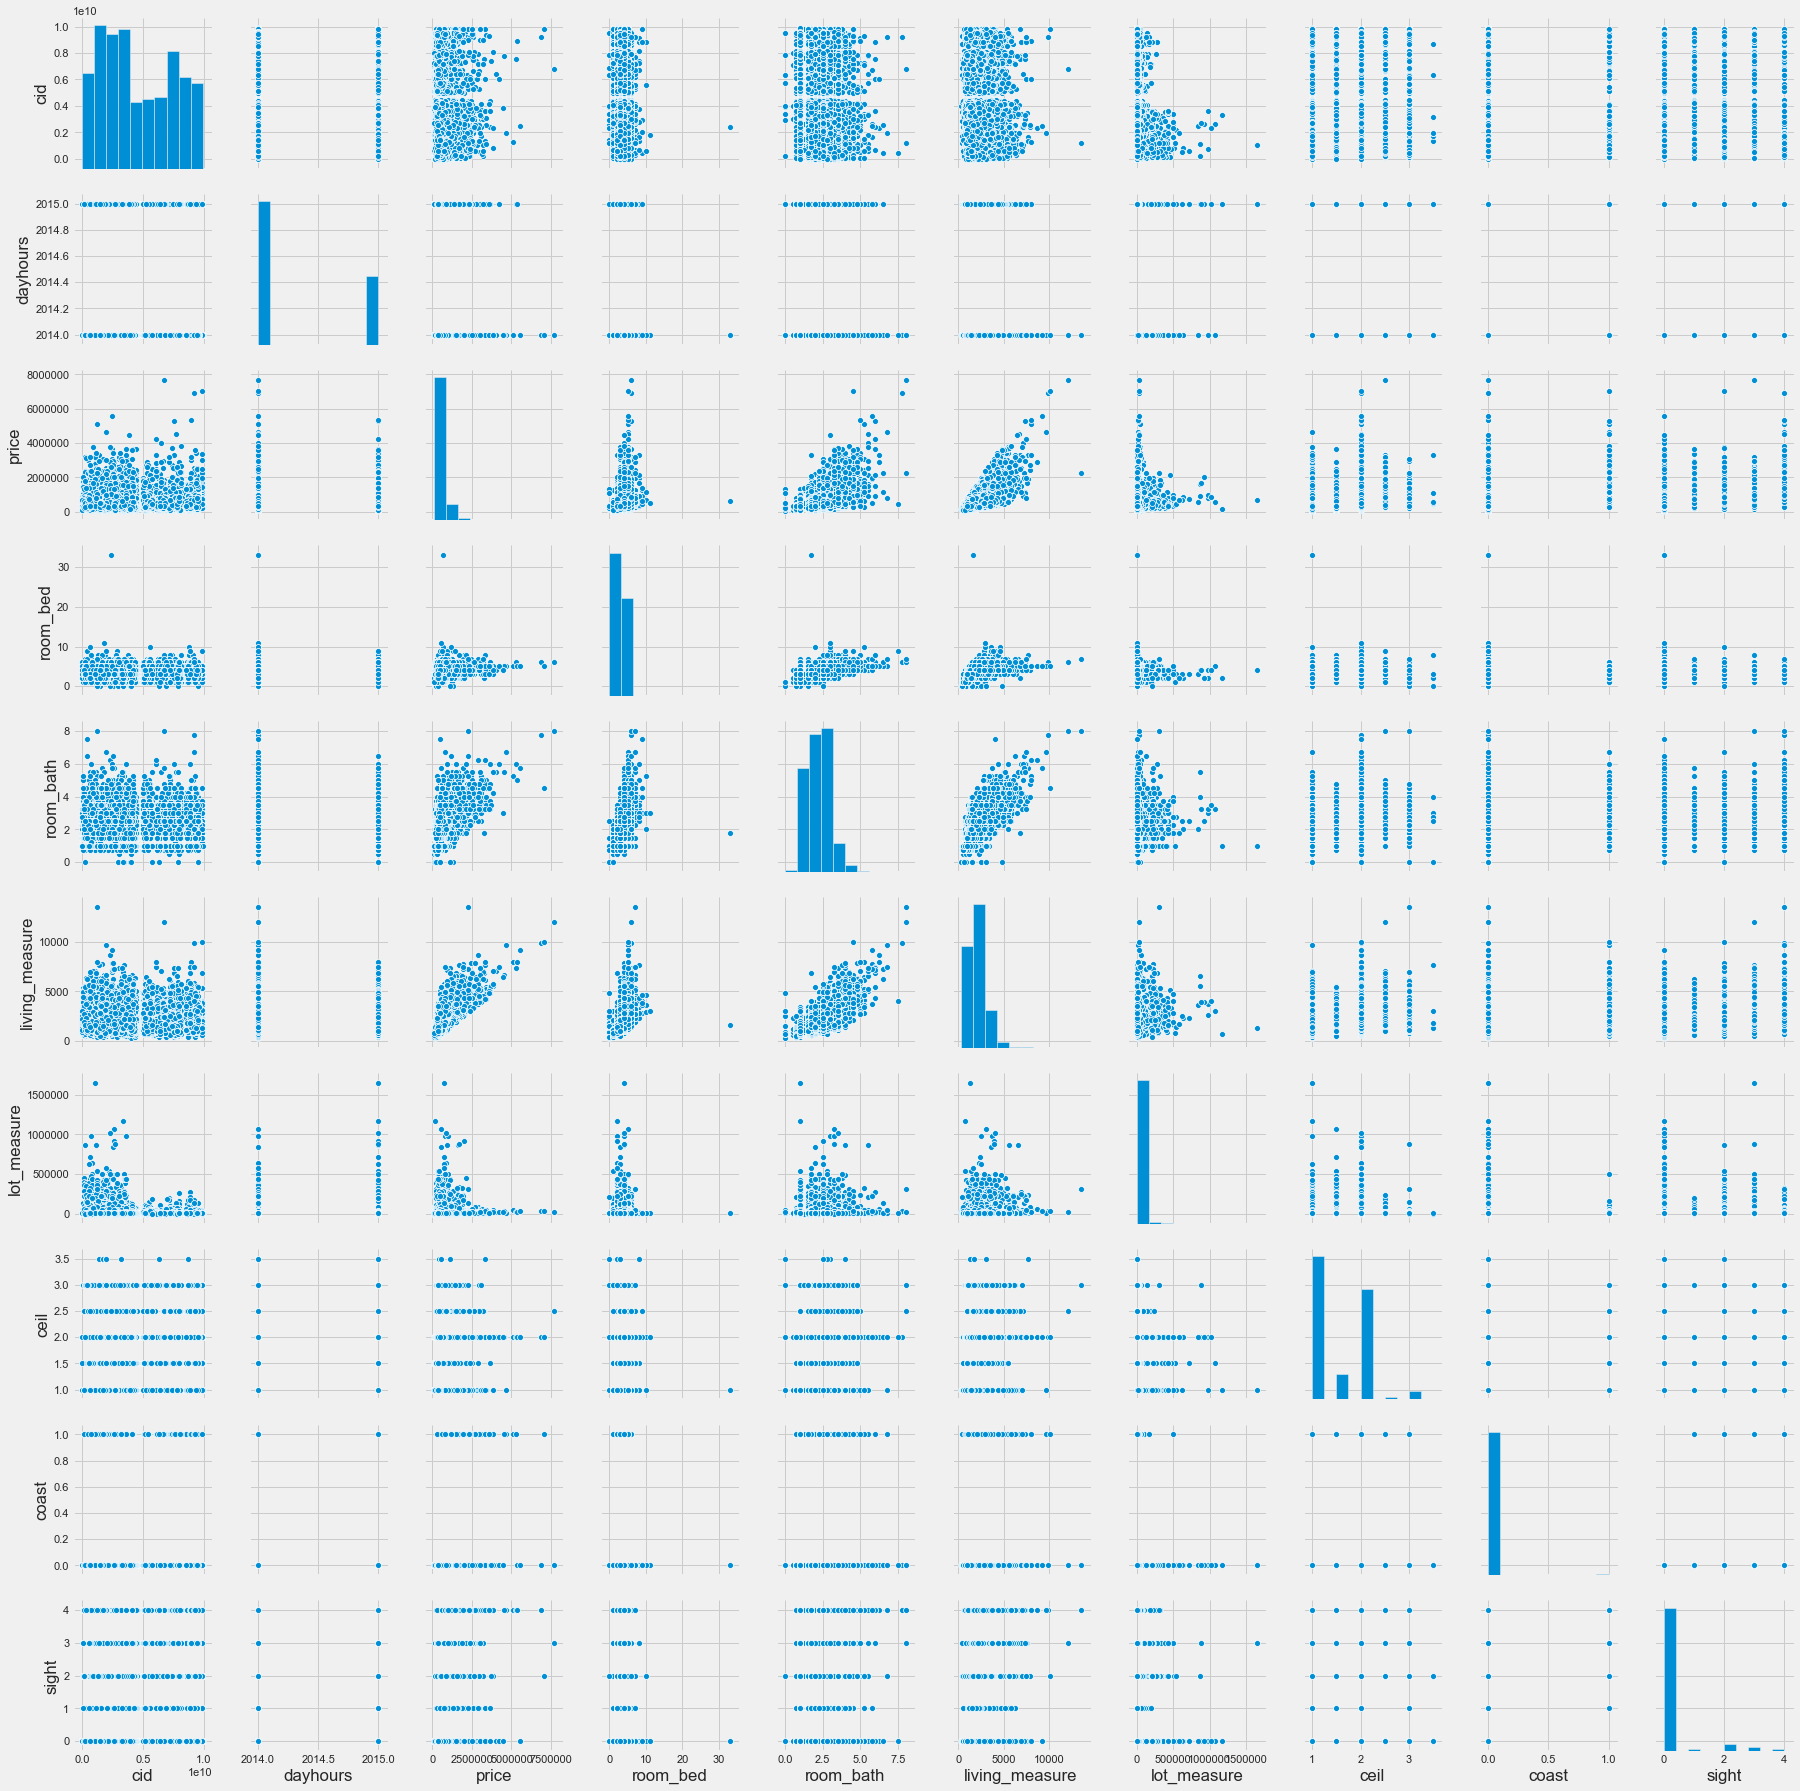

In [27]:
sns.pairplot(innercity_df.iloc[:,0:10] )

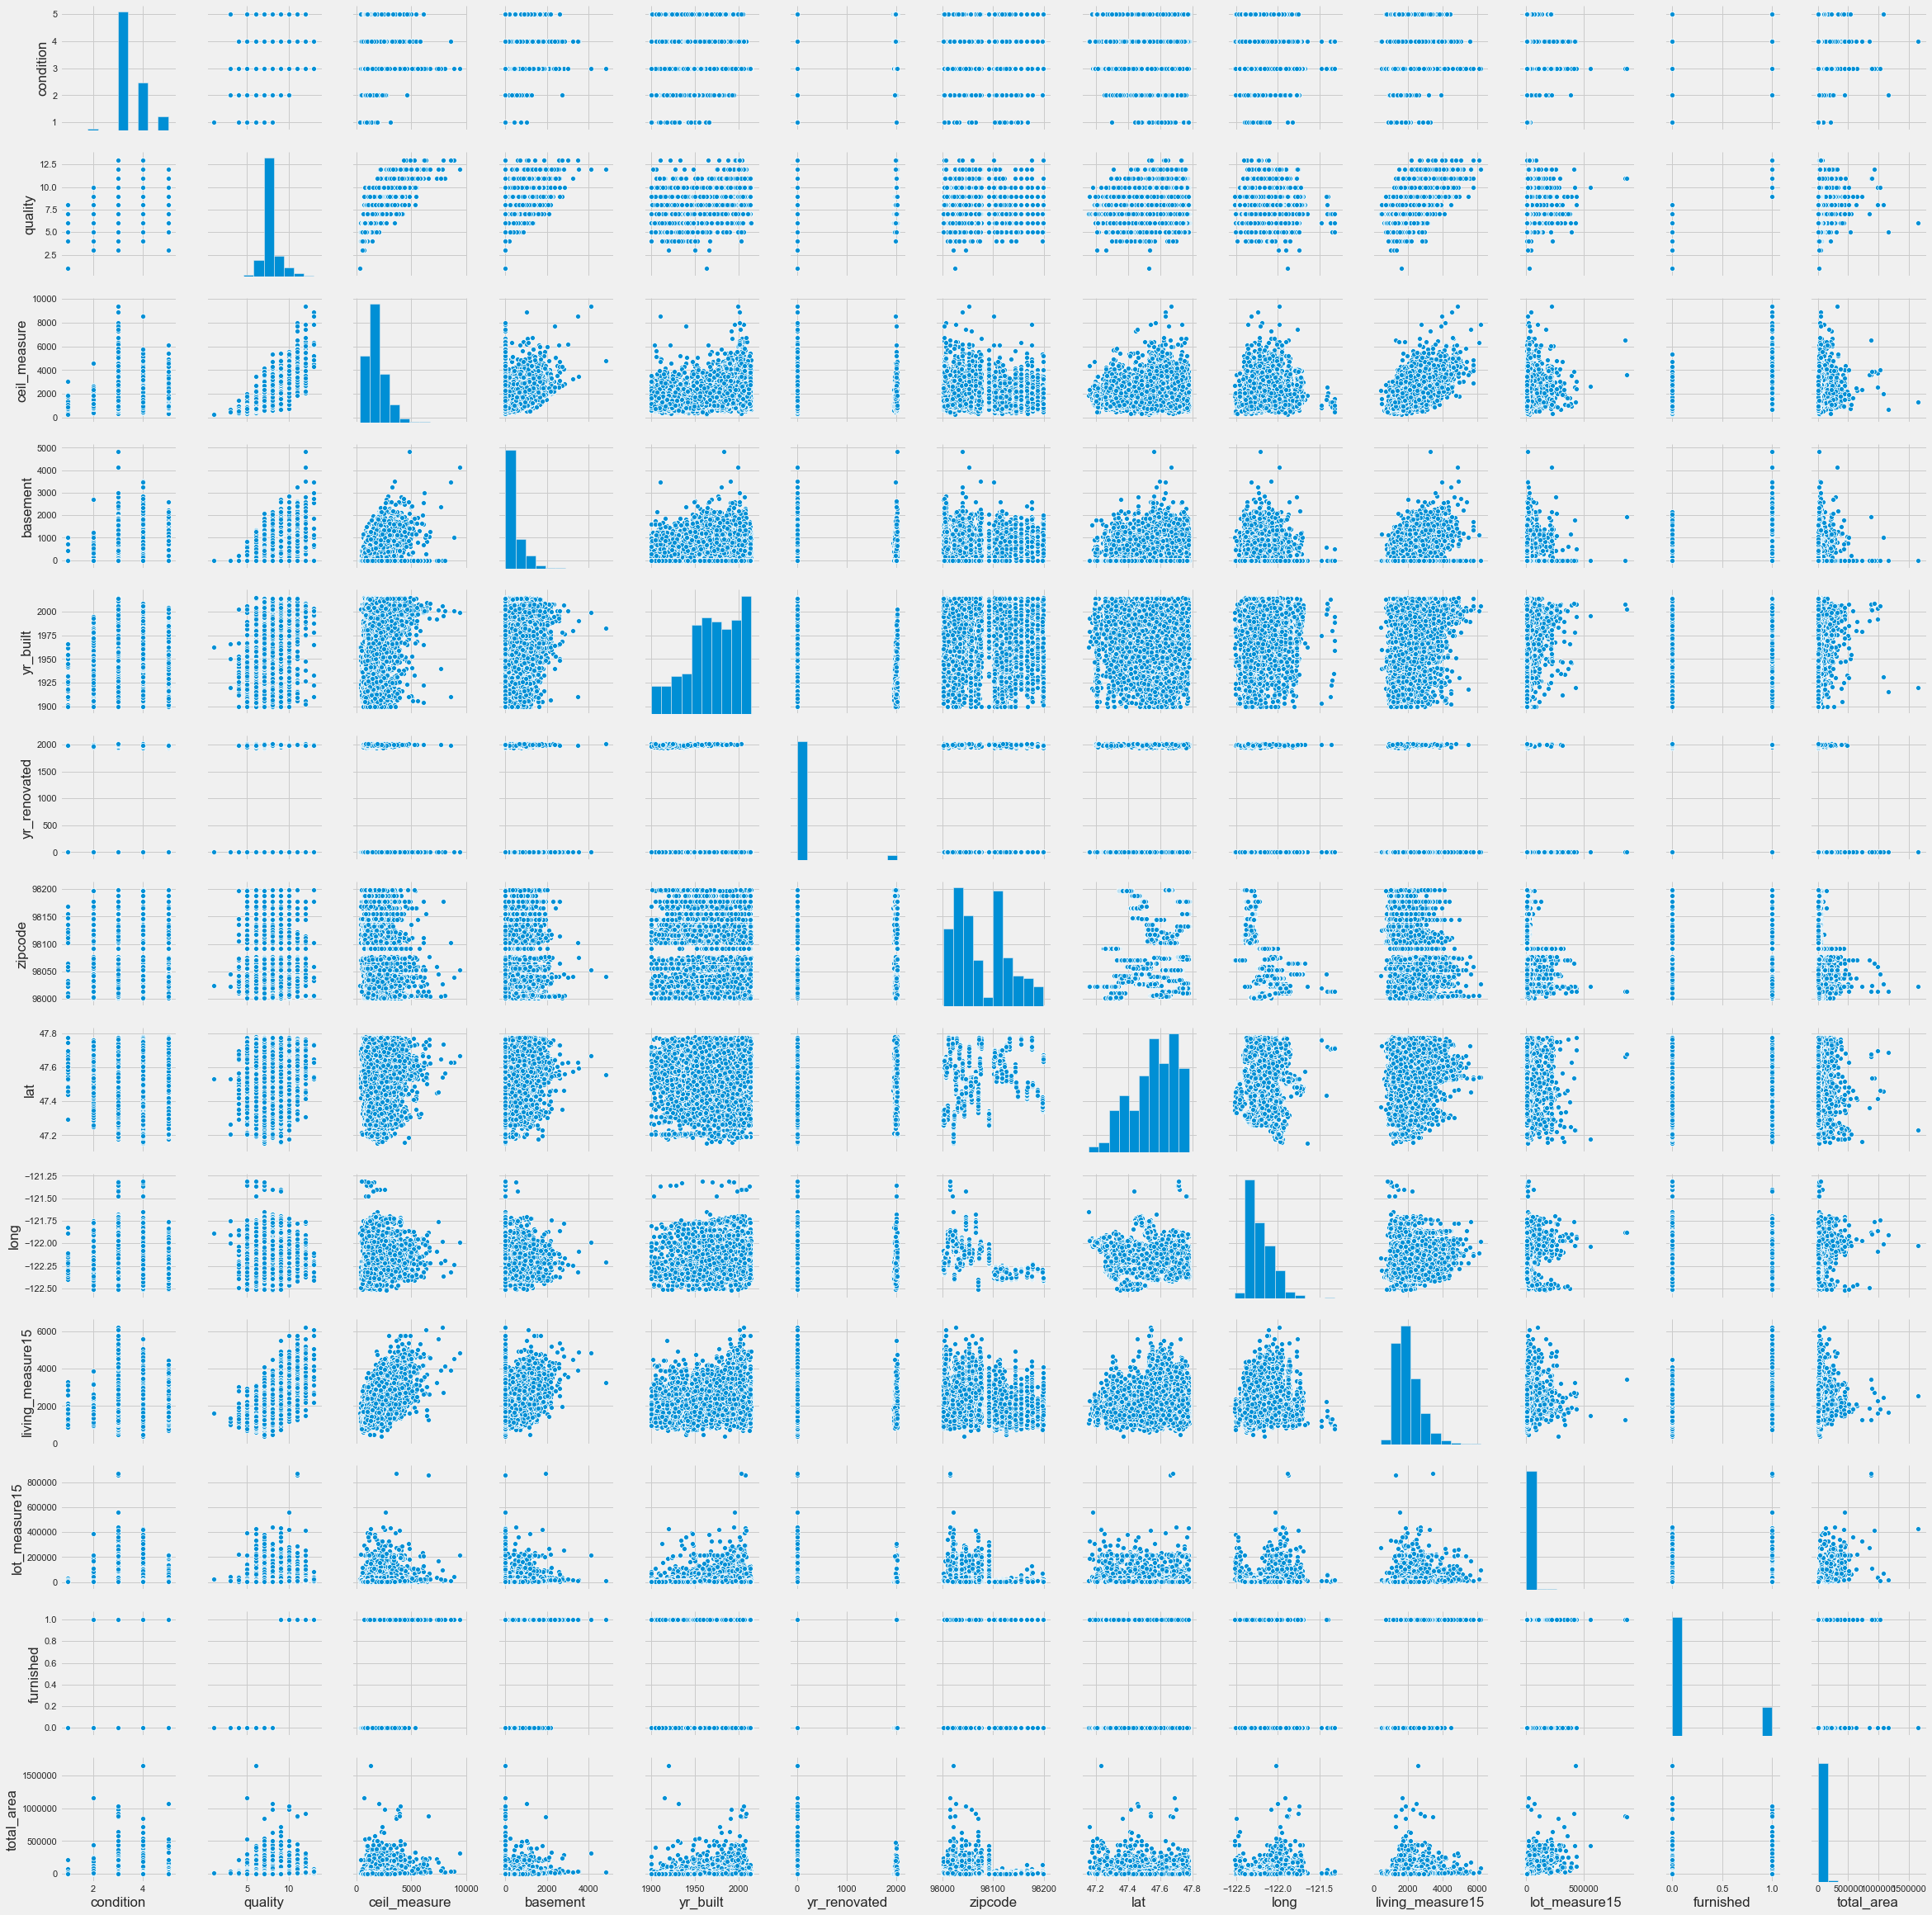

In [28]:
sns.pairplot(innercity_df.iloc[:,10:] )

##### Analysis:
    some independent varibles has linear correlation.
    But maximum of the variables are having very weak relation or no relation between them
    We will check the same in heatmap
    

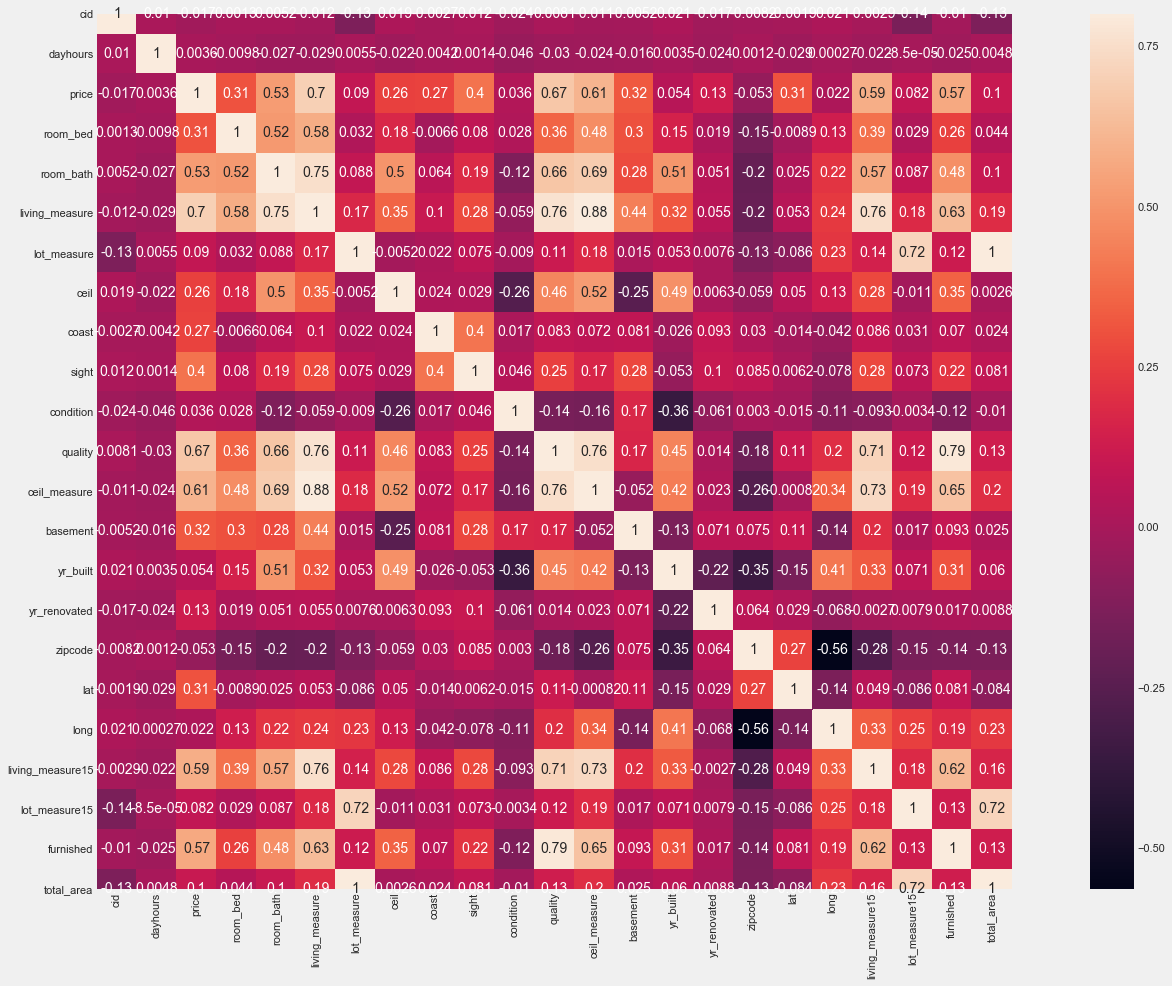

In [29]:
corrmat = innercity_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True,  annot=True);

#### Analysis:
    - Also from heatmap we can see ceil_measure,living_measure15,Living measure has high correlation values
    - cid aslo has low correlation. And cid is anyway just a unique identifier, during model building we have to ignore this cid
    - as mentioned earlier dayhour is only from 2014 and 2015, also from heat map , with price there is very low correlation value.so we can try to ignore this column also
    
   ##### Analysis of Independent variables:
       - very some independent variables has some high correlation values . for example :
       room-bath and living measure has a .75 correlation value.
       room_bath also have high correlation with ceil_measure
       quality aslo has high correlation with living_measure and ceil_measure
       ceil_measre and living measure has .88 correlation value which is expected.
       living_measure15 , living Measure also highly correlated.
       but maximum of the variables have very weak correlation. as we have seen in the pair plot.
       
    We will consider zipcode as categorial variable in later stage

In [30]:
## we will see the lat and long values where exactly it is residing . as we have 20000 data points. 
#it is not feasible to plot all data. we will plot only 2000 sampling records
import folium
import math
median_lat = innercity_df['lat'].median()
median_long = innercity_df['long'].median()
m = folium.Map(location=[median_lat, median_long], zoom_start=12)
# numofhtml = math.ceil(len(innercity_df['lat'])/2000)
# for j in range(numofhtml):

for i in range(2000):

    folium.Marker([innercity_df.loc[i, "lat"],innercity_df.loc[i, "long"]],
              ).add_to(m),
# m.save('geomap_'+str(j)+'.html')
m.save('geomap.html')
m

In [31]:
## applying log to price to make it gaussian distributed 
innercity_df['price1']=np.log(innercity_df['price'])


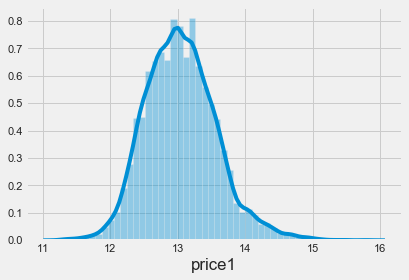

In [32]:
sns.distplot(innercity_df['price1'],kde=True);


    Before distribution of price was skewed . after applying log function,it was symmetric 
    We will check whetehr any correlation value improved after applying log

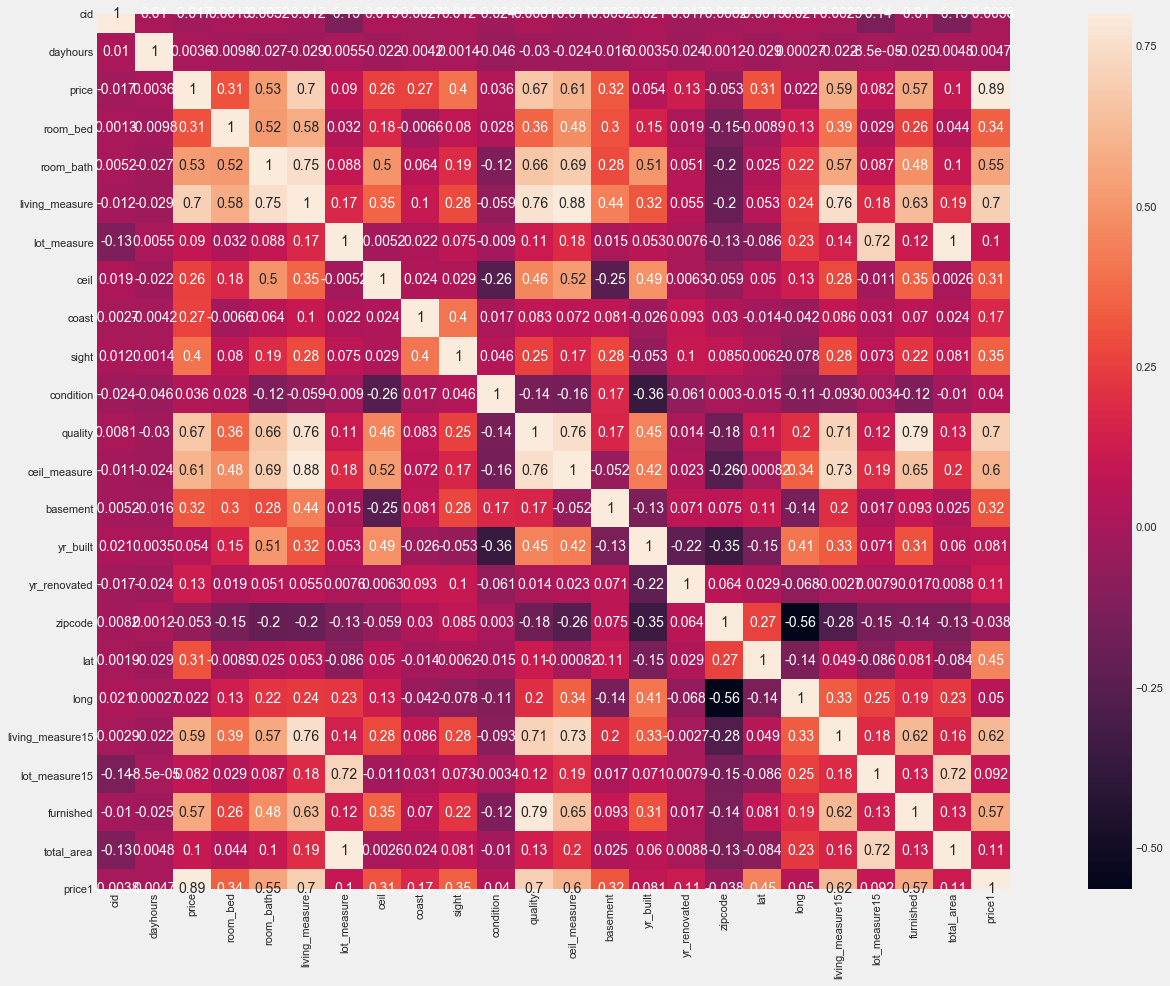

In [33]:
corrmat1 = innercity_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat1, vmax=.8, square=True,  annot=True);

In [34]:
# print(corrmat['price'])
# print(corrmat1['price']
df = pd.DataFrame({'price correlation before log': corrmat['price'],'price correlation after log':corrmat1['price1']})
df

price correlation before log  price correlation after log
basement                              0.323837                     0.316998
ceil                                  0.256786                     0.310556
ceil_measure                          0.605566                     0.601830
cid                                  -0.016797                    -0.003844
coast                                 0.266331                     0.174597
condition                             0.036392                     0.039574
dayhours                              0.003554                     0.004666
furnished                             0.565991                     0.573496
lat                                   0.306919                     0.449114
living_measure                        0.702044                     0.695380
living_measure15                      0.585374                     0.619333
long                                  0.021571                     0.049910
lot_measure                           0.089655                     0.099625
lot_measure15                         0.082456                     0.091600
price                                 1.000000                     0.891680
price1                                     NaN                     1.000000
quality                               0.667463                     0.703675
room_bath                             0.525134                     0.550819
room_bed                              0.308338                     0.343563
sight                                 0.397346                     0.346576
total_area                            0.104796                     0.114578
yr_built                              0.053982                     0.080638
yr_renovated                          0.126442                     0.114512
zipcode                              -0.053168                    -0.038294

### Analysis  : 
    As there is not much difference of value before and after applying log to price value. 
    we will retain the price without log applied

In [35]:
### remove cid and dayhours as analysed above

In [36]:
innercity_df.drop(['cid','dayhours','price1'],axis=1,inplace=True)

In [37]:
### as meniotned earlier removing the particular row of num of bed 33 , to reduce the imapce of extrem outlier
innercity_df[innercity_df['room_bed']==33]
innercity_df.drop(innercity_df[innercity_df['room_bed']==33].index, axis=0,inplace=True)

In [38]:
innercity_df.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ...  basement  yr_built  yr_renovated  zipcode  \
0      0          5        9  ...         0      1956             0    98133   
1      0          3        8  ...       800      1976             0    98023   
2      0          3        8  ...         0      2006             0    98038   
3      0          4        6  ...         0      1916             0    98133   
4      0          4        8  ...         0      1954             0    98115   

       lat     long  living_measure15  lot_measure15  furnished  total_area  
0  47.7174 -122.336              2120           7553          1       16477  
1  47.3165 -122.386              2260           8800          0       10050  
2  47.3515 -121.999              2370           4348          0        6694  
3  47.7049 -122.349              1520           3844          0        4664  
4  47.6768 -122.269              1900           5940          0        5450  

[5 rows x 21 columns]

### MODEL CREATION
    As target variable is continous variable, we will go for regression modelling.

In [ ]:
## Creating data X,y from the dataset, 
## Converting zipcode to categorical variables

In [40]:
innercity_df = pd.get_dummies(innercity_df,columns=['zipcode'],drop_first=True)
X = innercity_df.drop('price',axis=1)
Y = innercity_df['price']


In [41]:
X.shape

(21612, 88)

In [42]:
## deviding data set into 3 categories train,test,validation

In [43]:
x_train_validation,x_test,y_train_validation,y_test = train_test_split(X, Y, test_size=0.3,random_state=3)

In [44]:
x_train,x_validation,y_train,y_validation = train_test_split(x_train_validation, y_train_validation,test_size=0.3, random_state=3)

In [45]:
sc_X = StandardScaler()
X_stnd_train = sc_X.fit_transform(x_train)
X_stnd_test = sc_X.transform(x_test)
X_stnd_validation = sc_X.transform(x_validation)

X_stnd = sc_X.fit_transform(X)

In [46]:
# X_stnd_validation

###### As we have seen there are some linear relationship with the features, we will start with linear regression

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_stnd_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
accuracy = regressor.score(X_stnd_validation, y_validation)
print("Testing score: {}%".format(int(round(accuracy * 100))))
scores = cross_val_score(regressor,X_stnd,Y,cv = 10)
print("cross val scores: ",scores)
print("cross val scores mean: ",scores.mean())


Testing score: 80%
cross val scores:  [0.81471327 0.82381705 0.8005519  0.81582238 0.81960347 0.81771222
 0.80201312 0.76780218 0.79515018 0.80001374]
cross val scores mean:  0.8057199518470359


In [50]:
ypred = regressor.predict(X_stnd_validation)
np.sqrt(mean_squared_error(y_validation,(ypred)))

158613.60139926482

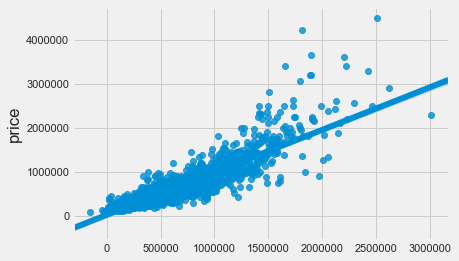

In [51]:
sns.regplot(x=ypred,y=y_validation)

## Decision tree 

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt_model1 = DecisionTreeRegressor()


In [54]:
dt_model1.fit(X_stnd_train, y_train)
dt_model1_train_score = dt_model1.score(X_stnd_train, y_train)
print("Training score: ",dt_model1_train_score)
dt_model1_test_score = dt_model1.score(X_stnd_validation, y_validation)
print("Testing score: ",dt_model1_test_score)

scores = cross_val_score(dt_model1,X_stnd,Y,cv = 10)
print(scores)
print(scores.mean())

Training score:  0.9995057680641538
Testing score:  0.715759723237505
[0.73527496 0.79280079 0.8060026  0.78814077 0.73473075 0.77679316
 0.73934595 0.81475632 0.7685319  0.75373464]
0.771011185298992


190579.50549878142


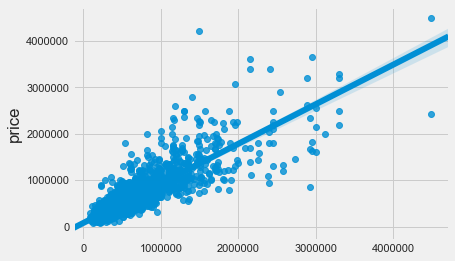

In [55]:
ypred = dt_model1.predict(X_stnd_validation)
print(np.sqrt(mean_squared_error(y_validation,(ypred))))
sns.regplot(x=ypred,y=y_validation)

As expected due to overfitting of decision tree the training score is 99.
But testing score is 71%. We will tune the decisiontree later

### SVR

In [56]:
from sklearn import svm
svrmodel1 = svm.SVR(kernel='rbf',degree=8,C=5)
svrmodel1.fit(X_stnd_train, y_train)
svrmodel1_score = svrmodel1.score(X_stnd_validation, y_validation)
print("Testing score: ",svrmodel1_score)
# scores = cross_val_score(svrmodel1,X_stnd,Y,cv = 10)
# scores

Testing score:  -0.06523513446987761


In [57]:
# SVR is giving worst result 

### APPLY PCA 

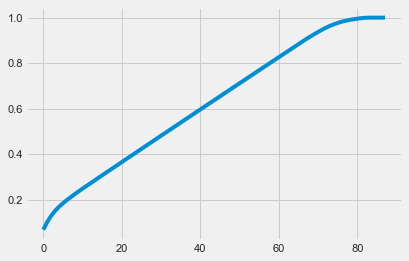

In [58]:
### APPLY PCA AND CHECK
from sklearn.decomposition import PCA
pca = PCA().fit(X_stnd_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [59]:
pca_final = PCA(n_components=80).fit(X_stnd_train)

In [60]:
X_pca_train1=pca_final.transform(X_stnd_train)
X_pca_test1=pca_final.transform(X_stnd_test)
X_pca_validation1=pca_final.transform(X_stnd_validation)

##### Applying Linear Regression on PCA derived data

In [61]:
regressorPca = LinearRegression()
regressorPca.fit(X_pca_train1, y_train)
accuracy = regressorPca.score(X_pca_validation1, y_validation)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 80%'

In [62]:
dt_modelpca = DecisionTreeRegressor()
dt_modelpca.fit(X_pca_train1, y_train)
dt_model_pca_train_score = dt_modelpca.score(X_pca_train1, y_train)
print("Training score: ",dt_model_pca_train_score)
dt_model_pca_test_score = dt_modelpca.score(X_pca_validation1, y_validation)
print("Testing score: ",dt_model_pca_test_score)

Training score:  0.9995057680641538
Testing score:  0.6578829712127037


209083.96767246735


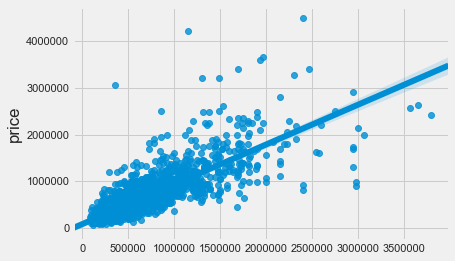

In [63]:
ypred = dt_modelpca.predict(X_pca_validation1)
print(np.sqrt(mean_squared_error(y_validation,(ypred))))
sns.regplot(x=ypred,y=y_validation)

### Appling PCA is not helping much..
    We will continue with original xtrain and x test
    SVR is also giving worse result. we will not proceed with SVR
    we will continue with Linear Regression and DecisionTree

#### Tuning Hyper Params

In [64]:
param = {'max_depth': [5,10,15,20],'criterion':['mse','friedman_mse','mae'],'min_samples_leaf': [2,5,7,8,9,10]}

In [65]:
### Tuning paramters for decision tree
dt_model1 = DecisionTreeRegressor()

In [66]:
dt_grid_model1 = GridSearchCV(dt_model1,param_grid=param)

In [67]:
dt_grid_model1.fit(X_stnd_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 5, 7, 8, 9, 10]},
             pr

In [68]:
dt_grid_model1.best_params_
# dt_grid_model1.best_score_

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 7}

In [69]:
dt_model2 = DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_leaf=7)

In [70]:
dt_model2.fit(X_stnd_train, y_train)
dt_model2_train_score = dt_model2.score(X_stnd_train, y_train)
print("Training score: ",dt_model2_train_score)
dt_model2_test_score = dt_model2.score(X_stnd_validation, y_validation)
print("Testing score: ",dt_model2_test_score)

scores = cross_val_score(dt_model2,X_stnd,Y,cv = 10)
print("cross val scores: ",scores)
print("cross val scores mean: ",scores.mean())

Training score:  0.8817583577260205
Testing score:  0.7568145440461544
cross val scores:  [0.8425063  0.82686291 0.82644341 0.80992067 0.7884416  0.82031322
 0.79442914 0.80193318 0.7977814  0.78457295]
cross val scores mean:  0.8093204774018072


176279.65259902965


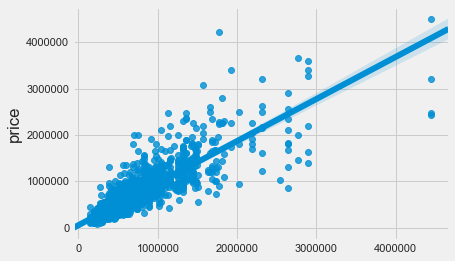

In [71]:
ypred = dt_model2.predict(X_stnd_validation)
print(np.sqrt(mean_squared_error(y_validation,(ypred))))
sns.regplot(x=ypred,y=y_validation)

In [72]:
featues_df=pd.DataFrame(dt_model2.feature_importances_,columns= ['importance'], index=x_train.columns).sort_values('importance')
featues_df

importance
zipcode_98040       0.000000
zipcode_98102       0.000000
zipcode_98092       0.000000
zipcode_98077       0.000000
zipcode_98075       0.000000
zipcode_98074       0.000000
zipcode_98070       0.000000
zipcode_98059       0.000000
zipcode_98058       0.000000
zipcode_98056       0.000000
zipcode_98055       0.000000
zipcode_98053       0.000000
zipcode_98052       0.000000
zipcode_98045       0.000000
zipcode_98042       0.000000
zipcode_98198       0.000000
zipcode_98103       0.000000
zipcode_98105       0.000000
zipcode_98107       0.000000
zipcode_98108       0.000000
zipcode_98188       0.000000
zipcode_98178       0.000000
zipcode_98177       0.000000
zipcode_98155       0.000000
zipcode_98148       0.000000
zipcode_98144       0.000000
zipcode_98136       0.000000
zipcode_98039       0.000000
zipcode_98133       0.000000
zipcode_98125       0.000000
...                      ...
zipcode_98032       0.000000
zipcode_98065       0.000013
zipcode_98034       0.000030
zipcode_98146       0.000031
zipcode_98168       0.000055
zipcode_98072       0.000061
room_bed            0.000071
zipcode_98166       0.000105
zipcode_98038       0.000119
condition           0.000141
zipcode_98106       0.000184
basement            0.000342
lot_measure         0.000524
ceil                0.000672
room_bath           0.000727
zipcode_98112       0.001115
zipcode_98109       0.001533
total_area          0.002893
lot_measure15       0.003814
ceil_measure        0.005924
zipcode_98004       0.009079
sight               0.013209
yr_built            0.013998
coast               0.024625
living_measure15    0.027370
quality             0.040529
long                0.092330
lat                 0.168283
living_measure      0.215109
furnished           0.377114

[88 rows x 1 columns]

### Apply regulrizations : Lasso and ridge

In [74]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(normalize=True, max_iter=1e5)
param = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
dt_grid_model2 = GridSearchCV(lassoreg,param_grid=param)
dt_grid_model2.fit(X_stnd_train,y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000.0, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
dt_grid_model2.best_params_


{'alpha': 0.01}

In [76]:
lassoreg1 = Lasso(normalize=True, max_iter=1e5,alpha=0.01)
lassoreg1.fit(X_stnd_train,y_train)
lassoreg1.score(X_stnd_validation, y_validation)
lassoreg1.

0.8031030558389332

158618.1480792463


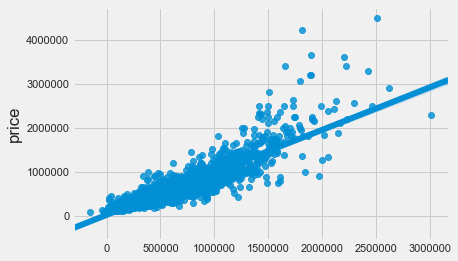

In [77]:
ypred = lassoreg1.predict(X_stnd_validation)
print(np.sqrt(mean_squared_error(y_validation,(ypred))))
sns.regplot(x=ypred,y=y_validation)

In [78]:
## Apply Ridge
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=1e-100,normalize=True)
param = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
dt_grid_model3 = GridSearchCV(ridgereg,param_grid=param)
dt_grid_model3.fit(X_stnd_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1e-100, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
dt_grid_model3.best_params_

{'alpha': 0.0001}

In [80]:
ridgereg = Ridge(alpha=0.0001,normalize=True)
ridgereg.fit(X_stnd_train,y_train)
ridgereg.score(X_stnd_validation, y_validation)

0.8031128653461461

158614.196811098


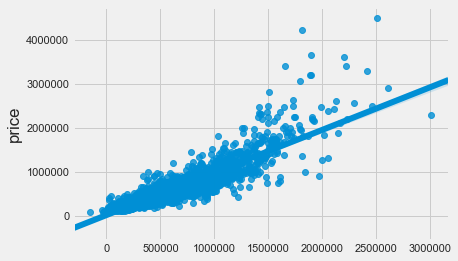

In [81]:
ypred = ridgereg.predict(X_stnd_validation)
print(np.sqrt(mean_squared_error(y_validation,(ypred))))
sns.regplot(x=ypred,y=y_validation)

### Apply Ensemble : gradient boosting

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
min_samples_split_val = [int(x) for x in np.arange(2,5)]
min_samples_leaf_val = [int(x) for x in np.arange(2,5)]
max_depth_val = [float(x) for x in np.arange(2,5)]
param = {'n_estimators': [1000,1500,2000], 'max_depth': max_depth_val,'min_samples_split':min_samples_split_val, 'min_samples_leaf':min_samples_leaf_val}
gbcl = GradientBoostingRegressor()
gbcl_grid_model = GridSearchCV(gbcl,param_grid=param,verbose=5,n_jobs=15)
gbcl_grid_model.fit(X_stnd_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed: 13.9min
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed: 50.0min
[Parallel(n_jobs=15)]: Done 243 out of 243 | elapsed: 110.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...ange=None,
                   

In [83]:
print(gbcl_grid_model.best_params_)
print(gbcl_grid_model.best_score_)

{'max_depth': 3.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1500}
0.8886344265569245


In [93]:
gbcl_final = GradientBoostingRegressor(max_depth = 3.0, min_samples_leaf= 4, min_samples_split= 3, n_estimators= 1000)
gbcl_final.fit(X_stnd_train, y_train)
gbcl_score = gbcl_final.score(X_stnd_validation, y_validation)
print("Testing score: ",gbcl_score)
scores = cross_val_score(randm_final_model,X_stnd,Y,cv = 10)
print("cross val scores: ",scores)
print("cross val scores mean: ",scores.mean())

Testing score:  0.8828049061452202
cross val scores:  [0.89229897 0.90516334 0.89620493 0.91690208 0.89088583 0.91062086
 0.89004505 0.88889406 0.90242473 0.90037097]
cross val scores mean:  0.8993810823577985


122350.35350776499


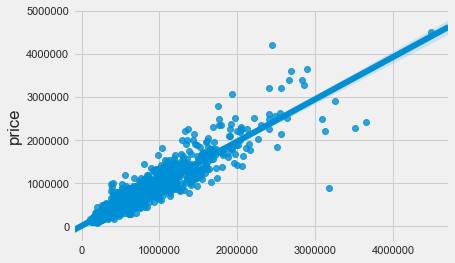

In [85]:
ypred = gbcl_final.predict(X_stnd_validation)
print(np.sqrt(mean_squared_error(y_validation,(ypred))))
sns.regplot(x=ypred,y=y_validation)

In [86]:
### AFter applying gradient boosting accuracy is 90%

### Apply Ensemble : Random Forest 

In [87]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
min_samples_split_val = [int(x) for x in np.arange(2,6)]
min_samples_leaf_val = [int(x) for x in np.arange(1,6)]
max_depth_val = [float(x) for x in np.arange(1,6)]
param = {'n_estimators': [1000,1500,2000], 'max_depth': max_depth_val,'min_samples_split':min_samples_split_val, 'min_samples_leaf':min_samples_leaf_val}

rf = RandomForestRegressor()
# Train the model on training data
randm_grid_model = GridSearchCV(rf,param_grid=param,verbose=5,n_jobs=15)
randm_grid_model.fit(X_stnd_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:  5.6min
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed: 14.6min
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed: 34.6min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 69.0min
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed: 122.7min
[Parallel(n_jobs=10)]: Done 862 tasks      | elapsed: 199.1min
[Parallel(n_jobs=10)]: Done 900 out of 900 | elapsed: 211.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=10,
             param_grid={'max_depth': [1.0, 2.0, 3.0,

In [88]:
print(randm_grid_model.best_params_)
print(randm_grid_model.best_score_)

{'max_depth': 5.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1000}
0.7663046927170408


In [94]:
randm_final_model = RandomForestRegressor(max_depth = 5.0, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 1000)
randm_final_model.fit(X_stnd_train, y_train)
randmfrst_score = randm_final_model.score(X_stnd_validation, y_validation)
print("Testing score: ",randmfrst_score)
scores = cross_val_score(randm_final_model,X_stnd,Y,cv = 10)
print("cross val scores: ",scores)
print("cross val scores mean: ",scores.mean())

Testing score:  0.7668655322891565
cross val scores:  [0.7846048  0.78388433 0.75124644 0.77467035 0.78539335 0.78589575
 0.75466741 0.78282733 0.7777936  0.76304284]
cross val scores mean:  0.7744026195217195


172598.34627836978


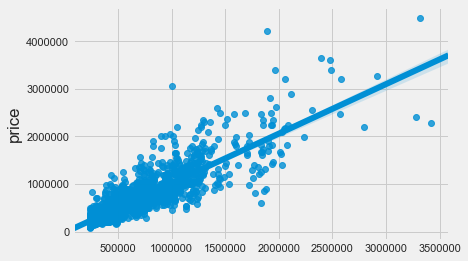

In [95]:
ypred = randm_final_model.predict(X_stnd_validation)
print(np.sqrt(mean_squared_error(y_validation,(ypred))))
sns.regplot(x=ypred,y=y_validation)

### As gradient boosting is giving best result we test the accuracy of test set on this model

score on test data set for gradient boosting:  0.8969392299739539
mean squared error on test data set for gradient boosting:  122143.48312633722


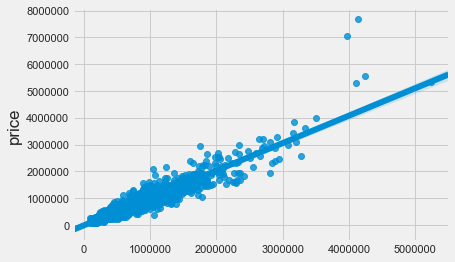

In [98]:
gbcl_score = gbcl_final.score(X_stnd_test, y_test)
print("score on test data set for gradient boosting: ",gbcl_score)
ypred = gbcl_final.predict(X_stnd_test)
print("mean squared error on test data set for gradient boosting: ", np.sqrt(mean_squared_error(y_test,(ypred))))
sns.regplot(x=ypred,y=y_test)

### Summary :
    We started with the Project details, Problem statement and data set description.
    EDA is done on the data set . we have uni variate , bi-variate analysis , heat map analysis 
    Cid and dayhours columns were removed during model creation as from the eda we checked it was not having relation with the target variable.
    Model creation we have started with Linear regression with 80% accuracy. and ended in with gradient boosting with 89% accuracy.
    We have tried PCA, but as there was not much liner realtion ships between the variables PCA did not help much/
    We have removed some rows and columns for better modelling
    We have done regularization techniques(lasso and ridge) also. which default takes care of the feature selections.
    Detail analysis are given after each sections
    We have seen that we have data only from 2014 to 2015. So if we can have data which covers more year, that might help to increase the performance.
    In future we could do cluster analysis for better results.
